In [9]:
import pandas as pd
import ast 
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [10]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval (x) if pd.notna(x) else x)

In [11]:
df = df[df['job_title_short'] == 'Data Analyst']

In [12]:
df_exploded = df.explode('job_skills')

In [13]:
skill_stats = df_exploded.groupby('job_skills').agg (
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

In [14]:
skill_count = 20
skill_stats = skill_stats.sort_values(by ='skill_count', ascending=False).head(skill_count)

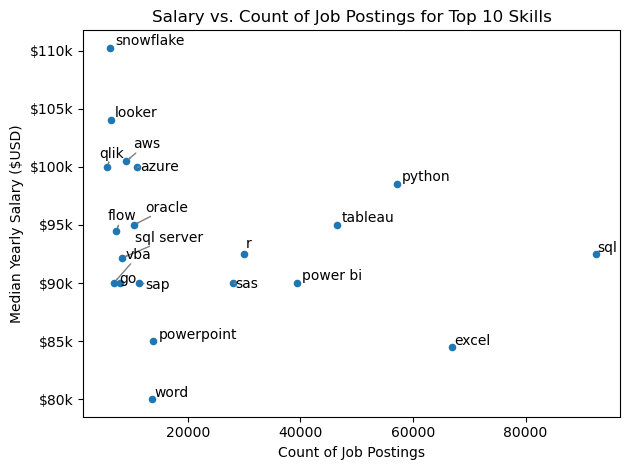

In [30]:
from adjustText import adjust_text


skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax= plt.gca()
ax.yaxis.set_major_formatter((plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k' )))

plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

plt.show()